In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_csv('data/CMU Data.csv')
#transform the datetime
df['Timestamp']=pd.to_datetime(df['Timestamp'])#,format='%Y-%m-%d')
print(df.shape)
df.head(10)

(2269, 10)


,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal
0,2020-09-10,0.243,0.94165,0.84195,3405.97,28.45,0.055,NaN,NaN,NaN
1,2020-09-09,0.243,0.94175,0.84725,3398.96,28.81,0.055,NaN,NaN,NaN
2,2020-09-08,0.240,0.94310,0.84915,3331.84,31.46,0.050,NaN,NaN,NaN
3,2020-09-07,0.237,0.94105,0.84615,NaN,NaN,NaN,NaN,NaN,5.291036e+08
4,2020-09-04,0.240,0.94125,0.84465,3426.96,30.75,0.052,NaN,NaN,1.030498e+09
5,2020-09-03,0.235,0.94170,0.84385,3455.06,33.60,0.046,NaN,NaN,-5.218812e+08
6,2020-09-02,0.239,0.94175,0.84355,3580.84,26.57,0.050,NaN,NaN,-8.181777e+08
7,2020-09-01,0.238,0.94375,0.83945,3526.65,26.12,0.050,137263.0,-60477.0,7.502295e+09
8,2020-08-31,0.232,0.94425,0.83775,3500.31,26.41,0.047,NaN,NaN,1.194068e+08
9,2020-08-28,0.237,0.94915,0.83995,3508.01,22.96,0.050,NaN,NaN,1.173889e+08


In [26]:
data=df.copy()
data['SPX'].interpolate(method='linear', direction = 'forward', inplace=True) 
data['VIX'].interpolate(method='linear', direction = 'forward', inplace=True) 
data['1Y OIS'].interpolate(method='linear', direction = 'forward', inplace=True) 
data=data.iloc[::-1] #flip to time order

In [27]:
data=data.iloc[2:2262,:] # drop head and tail that doesnt belong to weekly timeline

In [29]:
data.head()

,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal
2266,2012-01-04,0.684,1.30380,0.772708,1277.30,22.22,0.1120,NaN,NaN,NaN
2265,2012-01-05,0.675,1.29500,0.782442,1281.06,21.48,0.1060,NaN,NaN,NaN
2264,2012-01-06,0.639,1.29885,0.786133,1277.81,20.63,0.1070,NaN,NaN,NaN
2263,2012-01-09,0.612,1.30140,0.783239,1280.70,21.07,0.1000,NaN,NaN,NaN
2262,2012-01-10,0.606,1.30150,0.782932,1292.08,20.69,0.0925,147039.0,-56227.0,NaN


In [74]:
Tuesday_df=pd.DataFrame()
for i in range(4,len(data),5):
    Tuesday_df=Tuesday_df.append(data.iloc[i,:])
Tuesday_df.head()

,1Y OIS,EUR,JPY,Libor 1Y,Positioning,SPX,Signal,Timestamp,VIX,lev Positioning
2262,0.0925,0.782932,1.30150,0.606,147039.0,1292.08,NaN,2012-01-10,20.69,-56227.0
2257,0.0950,0.784960,1.30175,0.547,160317.0,1293.67,NaN,2012-01-17,22.20,-59704.0
2252,0.1050,0.767902,1.28665,0.550,176437.0,1314.65,NaN,2012-01-24,18.91,-57525.0
2247,0.1025,0.764614,1.31150,0.497,177254.0,1312.41,NaN,2012-01-31,19.44,-59523.0
2242,0.1310,0.753835,1.30245,0.503,196292.0,1347.05,NaN,2012-02-07,17.65,-66939.0


In [96]:
for i in range(4,len(data),5):
    for j in ['Libor 1Y','JPY','EUR','SPX','VIX','1Y OIS']:
        Tuesday_df[j].iloc[i//5]=np.mean(data[j][(i-4):(i+1)])

In [97]:
Tuesday_df.head()
# This is a df with only Tuesday avaible data which is the average of previous week

,1Y OIS,EUR,JPY,Libor 1Y,Positioning,SPX,Signal,Timestamp,VIX,lev Positioning
2262,0.10350,0.781491,1.30011,0.6432,147039.0,1281.790,NaN,2012-01-10,21.218,-56227.0
2257,0.09445,0.786050,1.30143,0.5486,160317.0,1292.424,NaN,2012-01-17,21.237,-59704.0
2252,0.10200,0.771511,1.29673,0.5540,176437.0,1313.714,NaN,2012-01-24,19.324,-57525.0
2247,0.10090,0.761725,1.30075,0.5172,177254.0,1317.246,NaN,2012-01-31,18.850,-59523.0
2242,0.12520,0.759341,1.30756,0.4832,196292.0,1337.182,NaN,2012-02-07,17.808,-66939.0


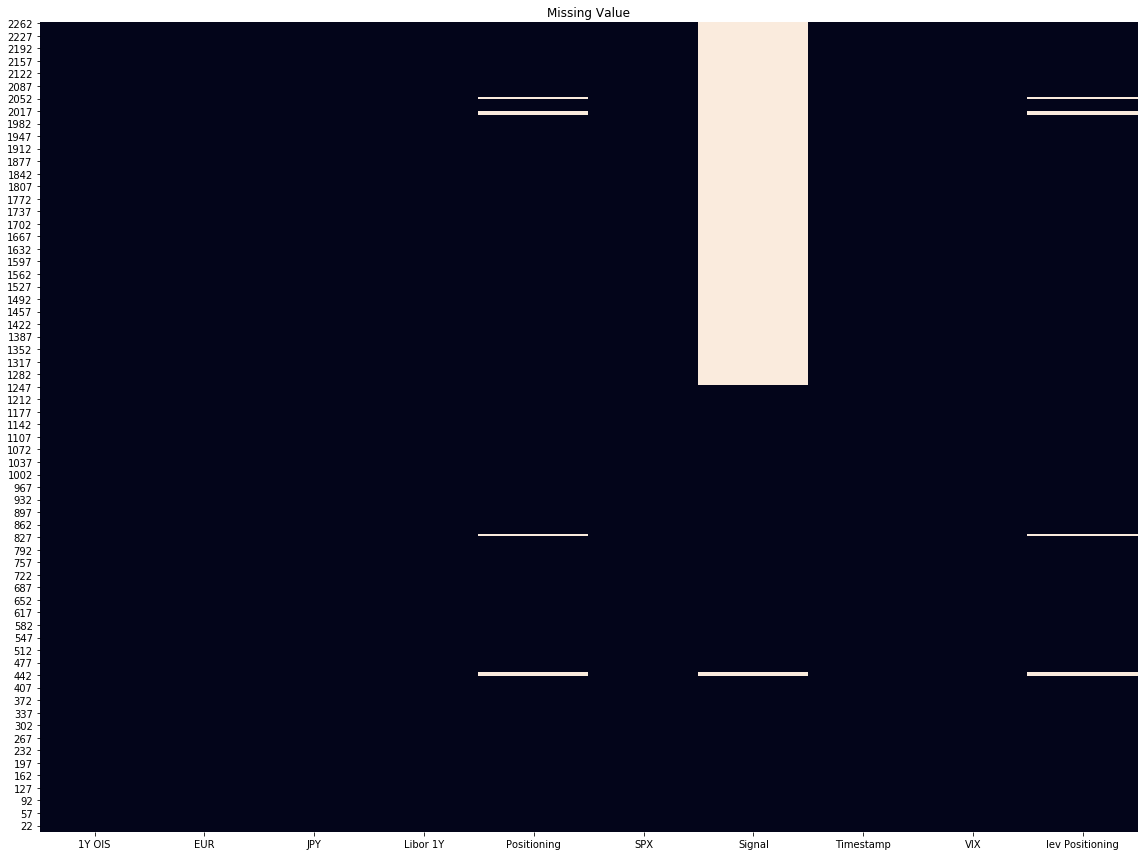

In [100]:
#Missing value plot
plt.figure(figsize=(16,12))
sns.heatmap(Tuesday_df.isnull(),cbar=False)
#sns.heatmap(df.iloc[np.unique(np.where(df.isnull())[0]),:].isnull(),cbar=False)
plt.title('Missing Value')
plt.tight_layout()
plt.savefig('Missing Value',dpi=300)
plt.show()

In [105]:
Tuesday_df=Tuesday_df.drop('Signal',axis=1)
Tuesday_df=Tuesday_df[pd.notnull(Tuesday_df['Positioning'])]

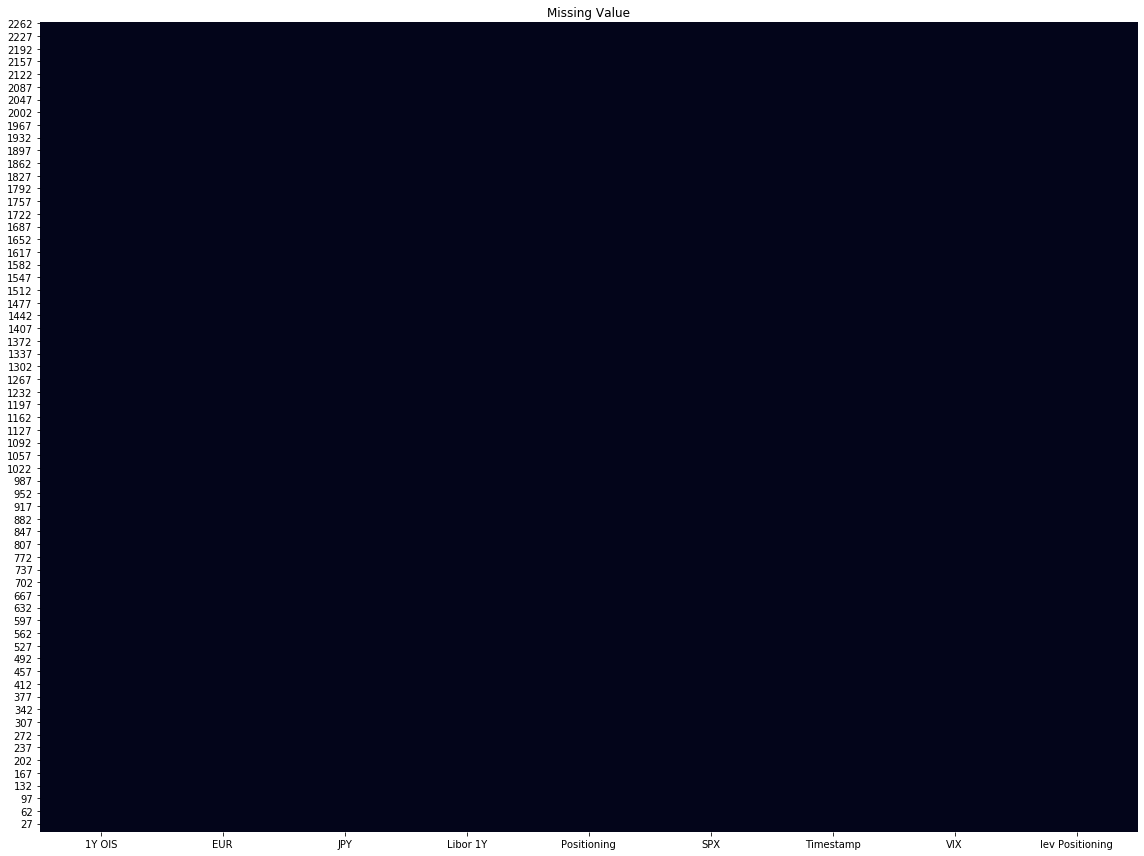

In [106]:
#Missing value plot
plt.figure(figsize=(16,12))
sns.heatmap(Tuesday_df.isnull(),cbar=False)
#sns.heatmap(df.iloc[np.unique(np.where(df.isnull())[0]),:].isnull(),cbar=False)
plt.title('Missing Value')
plt.tight_layout()
plt.savefig('Missing Value',dpi=300)
plt.show()

In [122]:

#Benchmark: OLS
#Since the dataset is already small, train&test set are not splitted yet
X=Tuesday_df.drop(['Timestamp','Positioning','lev Positioning'], axis=1)
y=Tuesday_df['Positioning']

In [125]:
import statsmodels.api as sm

model_OLS = sm.OLS(y, X).fit()
print(model_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:            Positioning   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1599.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):                   3.89e-295
Time:                        14:19:02   Log-Likelihood:                         -5282.7
No. Observations:                 446   AIC:                                  1.058e+04
Df Residuals:                     440   BIC:                                  1.060e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [127]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=20,random_state=0,criterion='mae',
                               min_samples_leaf = 2).fit(X,y)


mse=np.mean((y-model_RF.predict(X))**2)
ape=np.mean(np.abs((y-model_RF.predict(X))/y))
print('RF:')
print('MSE is {}'.format(mse))
print('Average Percentage Error is {}'.format(ape))

RF:
MSE is 89806670.1592826
Average Percentage Error is 0.05350266203670444
